In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [240]:
df = pd.read_csv("data.csv")
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [241]:
from sklearn.preprocessing import MinMaxScaler

In [242]:
scaler = MinMaxScaler()

In [243]:
df1 = scaler.fit_transform(df)

In [244]:
data = pd.DataFrame(df1, columns=['x1','x2','y'])
data

,x1,x2,y
0,0.055797,0.000002,1.0
1,0.123703,0.000002,1.0
2,0.015213,0.000002,1.0
3,0.073140,0.000002,1.0
4,0.055797,0.000002,1.0
...,...,...,...
2222,0.866874,0.000002,0.0
2223,0.859135,0.000002,0.0
2224,0.818376,0.000002,0.0
2225,0.793401,0.000002,0.0


In [245]:
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [246]:
mean_x1 = data['x1'].mean()
mean_x2 = data['x2'].mean()

In [247]:
data['x1'].fillna(value=mean_x1, inplace=True)
data['x2'].fillna(value=mean_x2, inplace=True)

In [248]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [249]:
data.head()

,x1,x2,y
0,0.055797,0.000002,1.0
1,0.123703,0.000002,1.0
2,0.015213,0.000002,1.0
3,0.073140,0.000002,1.0
4,0.055797,0.000002,1.0


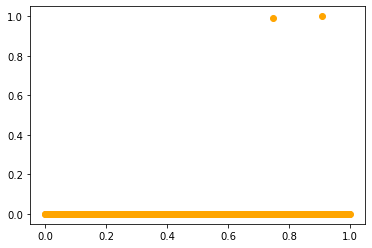

In [254]:
plt.scatter(data['x1'],data['x2'], marker='o', c = 'orange')

DETECTING OUTLIER USING Z-SCORE

In [255]:
mean = np.mean(data['x1'])
std = np.std(data['x1'])
print(f'The std is {std}')
print(f'The mean is {mean}')

The std is 0.2783378747121919
The mean is 0.48181877156565367


In [260]:
threshold = 1.8
outlier = []
for i in data['x1']:
    z = (i-mean)/std
    if z > threshold:
        print('outlier in dataset is', z)

outlier in dataset is 1.8216722604499196
outlier in dataset is 1.8616985883439623
outlier in dataset is 1.8210810237180015
outlier in dataset is 1.8099994254481144
outlier in dataset is 1.800603836980371
outlier in dataset is 1.8232779737631517
outlier in dataset is 1.809915936768565
outlier in dataset is 1.8520978084275186
outlier in dataset is 1.8297805609632338
outlier in dataset is 1.8415875668509092
outlier in dataset is 1.8279051122178036
outlier in dataset is 1.8049828517614597
outlier in dataset is 1.8572794019348537


In [257]:
X = data.drop(['y'], axis=1)
y = data['y']

SPLITTING THE DATASET

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

LOGISTIC REGRESSION

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [200]:
LR = LogisticRegression()

In [201]:
LR.fit(X_train, y_train)
ypred = LR.predict(X_test)

In [204]:
accuracy_test = accuracy_score(y_test,ypred)
accuracy_test

0.5816876122082585

DECISION TREE CLASSIFIER

In [207]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [209]:
Decision = DecisionTreeClassifier()

In [213]:
Decision.fit(X_train, y_train)
print('Depth of the Decision Tree :', Decision.get_depth())

Depth of the Decision Tree : 34


In [262]:
predict_train = Decision.predict(X_train)

In [263]:
accuracy_train = accuracy_score(y_train,predict_train)
print(f'Accuracy score on train data : {accuracy_train}')

Accuracy score on train data : 0.9994011976047904


In [221]:
predict_test = Decision.predict(X_test)
accuarcy_test = accuracy_score(y_test, predict_test)
print(f'Accuracy score on test data : {accuracy_test}')

Accuracy score on test data : 0.5816876122082585


SUPPORT VECTOR MACHINE WITH LINEAR KERNEL

In [229]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC(kernel='linear')
model.fit(X_train,y_train)

svm_predict_train = model.predict(X_train)
svm_accuracy_train = accuracy_score(y_train,svm_predict_train)
print(f'SVM Accuracy score on train data : {svm_accuracy_train}')

svm_predict_test = model.predict(X_test)
svm_accuracy_test = accuracy_score(y_test, svm_predict_test)
print(f'SVM Accuracy score on test data : {svm_accuracy_test}')


SVM Accuracy score on train data : 0.562874251497006
SVM Accuracy score on test data : 0.5421903052064632


SUPPORT VECTOR MACHINE WITH RBF KERNEL

In [230]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC(kernel='rbf')
model.fit(X_train,y_train)

svm_predict_train = model.predict(X_train)
svm_accuracy_train = accuracy_score(y_train,svm_predict_train)
print(f'SVM Accuracy score on train data : {svm_accuracy_train}')

svm_predict_test = model.predict(X_test)
svm_accuracy_test = accuracy_score(y_test, svm_predict_test)
print(f'SVM Accuracy score on test data : {svm_accuracy_test}')


SVM Accuracy score on train data : 0.5850299401197605
SVM Accuracy score on test data : 0.5816876122082585


KNN ALGORITHM

In [233]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
print('The number of neighbors : ',KNN.n_neighbors)

The number of neighbors :  5


In [235]:
knn_predict_train = KNN.predict(X_train)
knn_accuracy_train = accuracy_score(y_train,knn_predict_train)
print(f'knn Accuracy score on train data : {knn_accuracy_train}')

knn_predict_test = KNN.predict(X_test)
knn_accuracy_test = accuracy_score(y_test,knn_predict_test)
print(f'knn Accuracy score on test data : {knn_accuracy_test}')


knn Accuracy score on train data : 0.7011976047904191
knn Accuracy score on test data : 0.5637342908438061


    HERE THE DECISION TREE CLASSIFIER SHOWS GREATER ACCURACY ON THE TRAINING DATASET WHEN COMPARED TO OTHER ALGORITHMS. HENCE DECISION TREE CLASSIFIER IS A SUITABLE MACHINE LEARNING ALGORITHM TO PREDICT THE OUTPUT AND ACCURACY 